In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np

# parabola
from spaces.twoD import Parabola, SGDOneVariable, SGDOneVariableLRDecay
from spaces.twoD import SGDVisOneVariable

# 3d surfaces

# animation
from animation.scene import Scene, Video, GIFfromMP4Video

# Functions
A parabolic function  

In [2]:
xs = [i-5 for i in range(11)]
y =  xs
# f = Parabola(x_series=xs)
# f.plot_function()

In [3]:
xs

[-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5]

# Gradient Descent

In [22]:
FILE_NAME_WO_EXTENSION = 'sgd'
PLOT_TITLE = 'SGD'
ITER = 29*5
N_BACK = 20

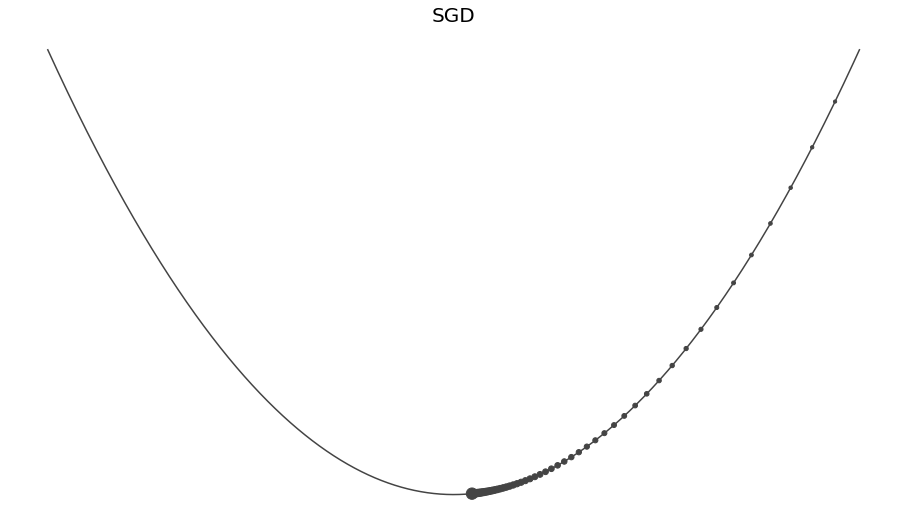

In [23]:
gd = SGDOneVariable(theta = 4, lr = 0.03, x_series = xs)
iters = gd.store_iterations(ITER)
iters_list = [iters]
SGDVisOneVariable(iters=iters_list, plot_title=PLOT_TITLE).export_frame(steps=50, n_back = 50)

In [24]:
for i in range(ITER):
    file_path = 'frames/plot_{0:03}.png'.format(i)
    fig = SGDVisOneVariable(iters=[iters], plot_title=PLOT_TITLE).export_frame(steps=i, n_back = N_BACK, path = '')
    fig.savefig(file_path)

In [25]:
video = Video(dir_to_save='frames', video_name=FILE_NAME_WO_EXTENSION, frame_rate = 29)
cmd_video = video.get_fmpeg_video_cmd()
os.system(cmd_video)

video

gif = GIFfromMP4Video(file_name=FILE_NAME_WO_EXTENSION, dir_to_save = '', frame_rate = 29)
cmd_gif = gif.get_fmpeg_gif_cmd()
os.system(cmd_gif)

gif

GIF('sgd.gif' from 'sgd.mp4')

In [26]:
print(cmd_gif)

ffmpeg -i sgd.mp4 -vf palettegen palette.png -y 
ffmpeg -i sgd.mp4 -pix_fmt rgb24 -i palette.png -lavfi paletteuse sgd.gif 
rm palette.png -y


## Gradient Descent with LR Decay

- The learning rate is decayed until the iteration $\tau$.  

- The learning rate on the iteration $k$ calculated as $ \epsilon_k = (1-\alpha)\epsilon_0+\alpha \epsilon_{\tau}$ where $\alpha = \frac{k}{\tau}$  

- The learning rate after the iteration $\tau$ is kept constant.  
- $\epsilon_{\tau}$ is generally set to 1 % of the initial learning rate ($\epsilon_0$).    

In [27]:
PLOT_TITLE =  'SGD with Learning Rate Decay (green) vs SGD (gray)'
FILE_NAME_WO_EXTENSION = 'sgd-with-lr-decay'
steps_n = 50

gd = SGDOneVariableLRDecay(theta = 4, lr = 0.03*5, tau = 10, x_series = xs)
iters_lr_decay = gd.store_iterations(ITER)
# SGDVisOneVariable(iters=[iters_lr_decay], plot_title=PLOT_TITLE).export_frame(steps=ITER, n_back = 50)

## Compare SGD and SGD with LR Decay

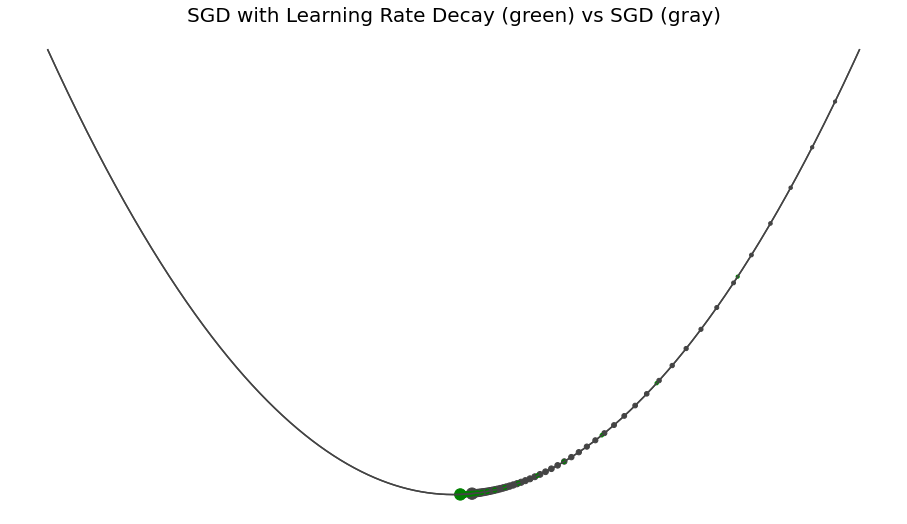

In [28]:
SGDVisOneVariable(iters=[iters, iters_lr_decay], plot_title=PLOT_TITLE).export_frame(steps=steps_n, n_back = 50, path = '')

In [29]:
for i in range(ITER):
    file_path = 'frames/plot_{0:03}.png'.format(i)
    fig = SGDVisOneVariable(iters=[iters, iters_lr_decay], plot_title=PLOT_TITLE).export_frame(steps=i, n_back = N_BACK, path = '')
    fig.savefig(file_path)

In [30]:
video = Video(dir_to_save='frames', video_name=FILE_NAME_WO_EXTENSION, frame_rate = 29)
cmd_video = video.get_fmpeg_video_cmd()
os.system(cmd_video)

video

gif = GIFfromMP4Video(file_name=FILE_NAME_WO_EXTENSION, dir_to_save = '', frame_rate = 29)
cmd_gif = gif.get_fmpeg_gif_cmd()
os.system(cmd_gif)

gif

GIF('sgd-with-lr-decay.gif' from 'sgd-with-lr-decay.mp4')

# Momentum

In [5]:
from spaces.threeD import Himmelblau

In [6]:
ITERS = 29*5
ALPHA = 0.95
FILE_NAME_WO_EXTENSION = 'momentum-vs-nesterov-momentum'
NESTEROV_FILE_NAME_WO_EXTENSION = 'sgd-with-momentum-with-nesterov'
PLOT_TITLE = f'Momentum with alpha: {ALPHA}'
NESTEROV_PLOT_TITLE = f'Nesterov Momentum with alpha: {ALPHA}'

In [7]:
h = Himmelblau(space_lim_min = -6, space_lim_max = 6,
               x_initial = -1,
               y_initial = -5)

steps_standard = h.run_gd(epsilon = 0.001 , iteration = ITERS, alpha = ALPHA, nesterov=False)
steps_nesterov = h.run_gd(epsilon = 0.001 , iteration = ITERS, alpha = ALPHA, nesterov=True)

In [8]:
import math
from matplotlib import cm

for i in range(ITERS):
    file_path = 'frames/plot_{0:03}.png'.format(i)
    fig = h.plot_steps([steps_standard, steps_nesterov],
                       steps_until_n=i,
                       azimuth=5-math.log(i+1),
                       elevation = 40+math.log(i+1),
                       color_map = cm.gray, n_back = 20,
                       plot_title = 'Standard Momentum (black) vs Nesterov Momentum (red)',
                       colors = ['gray', 'red']
                      )
    fig.savefig(file_path)

In [9]:
video = Video(dir_to_save='frames', video_name=FILE_NAME_WO_EXTENSION, frame_rate = 29, resolution=480)
cmd_video = video.get_fmpeg_video_cmd()
os.system(cmd_video)

video

gif = GIFfromMP4Video(file_name=FILE_NAME_WO_EXTENSION, dir_to_save = '', frame_rate = 29)
cmd_gif = gif.get_fmpeg_gif_cmd()
os.system(cmd_gif)

gif

GIF('momentum-vs-nesterov-momentum.gif' from 'momentum-vs-nesterov-momentum.mp4')

# Nesterov Momentum

In [3]:
h = Himmelblau(space_lim_min = -6, space_lim_max = 6,
               x_initial = -1,
               y_initial = -5)

steps = h.run_gd(epsilon = 0.001 , iteration = ITERS, alpha = ALPHA, nesterov=True)

from matplotlib import cm
# h.plot_steps(steps, azimuth=5, elevation = 40, color_map = cm.gray, n_back = 20, steps_until_n=40)

NameError: name 'Himmelblau' is not defined

In [44]:
for i in range(ITERS):
    file_path = 'frames/plot_{0:03}.png'.format(i)
    fig = h.plot_steps(steps,
                       steps_until_n=i,
                       azimuth=5-math.log(i+1),
                       elevation = 40+math.log(i+1),
                       color_map = cm.gray, n_back = 20,
                       plot_title = NESTEROV_PLOT_TITLE
                      )
    fig.savefig(file_path)

In [22]:
video = Video(dir_to_save='frames', video_name=NESTEROV_FILE_NAME_WO_EXTENSION, frame_rate = 29, resolution=480)
cmd_video = video.get_fmpeg_video_cmd()
os.system(cmd_video)

video

gif = GIFfromMP4Video(file_name=NESTEROV_FILE_NAME_WO_EXTENSION, dir_to_save = '', frame_rate = 29)
cmd_gif = gif.get_fmpeg_gif_cmd()
os.system(cmd_gif)

gif

GIF('sgd-with-momentum-with-nesterov.gif' from 'sgd-with-momentum-with-nesterov.mp4')

In [23]:
cmd_video

'ffmpeg  -framerate 29 -i frames/plot_%03d.png -s:v 640x480 -c:v libx264 -profile:v high -crf 20 -pix_fmt yuv420p -r 30  sgd-with-momentum-with-nesterov.mp4 -y'